Author @Tonghong Chen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd

# Data Preparation

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### create training and testing datasets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.2)

### standardize the training data

In [4]:
from sklearn.preprocessing import StandardScaler
X_std_train = StandardScaler().fit_transform(X_train)
X_std_test = StandardScaler().fit_transform(X_test)

### Colinerality Detection

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(pd.DataFrame(X_std_train).corr())

In [6]:
pd.Series(eigenvalues).sort_values()

7     0.065538
10    0.161420
12    0.192342
11    0.204807
9     0.292406
8     0.371320
6     0.555757
5     0.638950
4     0.813260
3     0.914833
2     1.319791
1     1.452746
0     6.016830
dtype: float64

in this example, the index 8's eigenvalue, 0.066379, is very small compared to the others. Small value represents presence of collinearity. 

****

# Linear Regression

### Multi-Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()
reg.fit(X_std_train, y_train)
print("R^2 on test set: %f" % reg.score(X_std_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Or use scipy's package that provides greater statistics summary

In [17]:
import statsmodels.api as sm

In [37]:
# We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.
X_constant = sm.add_constant(X_std_train)
lr_model = sm.OLS(y_train, X_constant)
fitted_model = lr_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     88.71
Date:                Wed, 14 Mar 2018   Prob (F-statistic):          9.89e-108
Time:                        23:14:21   Log-Likelihood:                -1181.3
No. Observations:                 404   AIC:                             2391.
Df Residuals:                     390   BIC:                             2447.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2735      0.228     97.648      0.000      21.825      22.722
x1            -0.6126      0.323     -1.897      0.059      -1.248       0.022
x2             0.8424      0.344      2.452      0.015       0.167       1.518
x3            -0.1413      0.455     -0.310      0.756      -1.036       0.754
x4             0.8575      0.238      3.597      0.000       0.389       1.326
x5            -2.2087      0.500     -4.420      0.000      -3.191      -1.226
x6             2.6621      0.315      8.440      0.000       2.042       3.282
x7            -0.2851      0.398     -0.717      0.474      -1.067       0.497
x8            -3.0900      0.451     -6.855      0.000      -3.976      -2.204
x9             2.6572      0.618      4.300      0.000       1.442       3.872
x10           -1.8698      0.667     -2.804      0.005      -3.181      -0.559
x11           -1.7510      0.295     -5.933      0.000      -2.331      -1.171
x12            1.0036      0.268      3.741      0.000       0.476       1.531
x13           -3.5121      0.389     -9.019      0.000      -4.278      -2.746
==============================================================================
Omnibus:                      139.640   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.308
Skew:                           1.472   Prob(JB):                    1.32e-127
Kurtosis:                       8.103   Cond. No.                         9.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rdige, Lasso and Elastic-Net Regression

##### Basic Models

Note: If __normalize is set to "True"__, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [61]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.5, normalize=False) 
reg.fit(X_std_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.4, normalize=False) 
reg.fit(X_std_train, y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=0.02, l1_ratio=0.5, normalize=False) 
reg.fit(X_std_train, y_train)

ElasticNet(alpha=0.02, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

##### Auto-Selected Models

In [74]:
# Lasso model fit with Lars using BIC or AIC for model selection
from sklearn.linear_model import LassoLarsIC
reg = LassoLarsIC(criterion='bic')
reg.fit(X_std_train, y_train)

LassoLarsIC(copy_X=True, criterion='bic', eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, normalize=True, positive=False,
      precompute='auto', verbose=False)

### Robust Regression

__RANdom SAmple Consensus (RANSAC) Algorithm: random sampling from the sample data to identify the possible outliers__

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [40]:
from sklearn.linear_model import RANSACRegressor
reg = RANSACRegressor()
reg.fit(X_std_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

### Principle Coponent Regression

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [62]:
reg = LinearRegression()
u = PCA(n_components=5).fit(X_std_train).transform(X_std_train)
reg.fit(u, y_train)   # u is the left singular vector

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

****

# Non-Linear Regression

### K Nearest Neighbor Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2, metric='minkowski', p=2)
reg.fit(X_std_train, y_train)

### Support Vctor Regression

In [33]:
from sklearn.svm import SVR
# svr = SVR(kernel='linear')
# svr = SVR(kernel='poly', C=1e3, degree=2)
reg = SVR(kernel='rbf',C=1e3, gamma=0.1)
reg.fit(X_std_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Decision Tree Regression

In [6]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_std_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Random Forest Regression

In [8]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=500, criterion='mse',n_jobs=-1)
reg.fit(X_std_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### AdaBoost Regression (with Decision Tree)

In [9]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500)
reg.fit(X_std_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=None)

****

# Metrics for Regression

In [41]:
y_train_pred = reg.predict(X_std_train)
y_test_pred = reg.predict(X_std_test)

### MSE

In [43]:
from sklearn.metrics import mean_squared_error

In [47]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 105.8066, test: 111.5859


### R Square

In [49]:
from sklearn.metrics import r2_score

In [50]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: -0.3177, test: -0.1222


### Residual Analysis

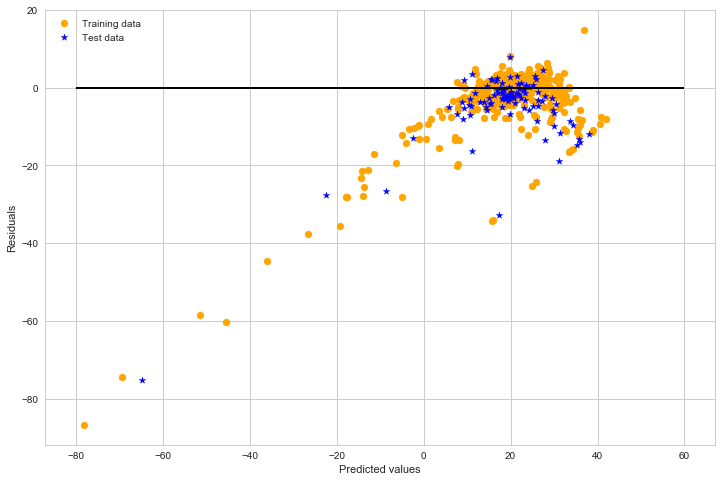

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='orange', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='*', label='Test data')
plt.hlines(y=0, xmin=-80, xmax=60, lw=2, color='k')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
#plt.xlim([-10, 50])
plt.show()